In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
np.random.seed([0])
x=np.array([np.random.randint(10,size=(6,7))])
print(x)
y=x[0::2]
print(y)


[[[2 5 4 2 5 8 3]
  [9 0 9 7 4 8 3]
  [9 6 3 9 4 1 7]
  [3 2 5 1 6 9 9]
  [2 4 7 4 7 2 5]
  [9 8 1 4 6 3 3]]]
[[[2 5 4 2 5 8 3]
  [9 0 9 7 4 8 3]
  [9 6 3 9 4 1 7]
  [3 2 5 1 6 9 9]
  [2 4 7 4 7 2 5]
  [9 8 1 4 6 3 3]]]


In [7]:
File = '/home/gramx/Desktop/cosmology_codes/light_cones/lcone/lightcone_physical.cbin'
f = open (File, 'rb')

N = np.fromfile (f, count=3, dtype=np.uint32)
Nx,Ny,Nz = N
print(N.dtype)

lc_data = np.fromfile (f, count=Nx*Ny*Nz, dtype=np.float32)

f.close()
lc_data = lc_data.reshape ((Nx,Ny,Nz), order='C')
print(lc_data.shape)
print(N)
#print(grid_size)


uint32
(232, 232, 339)
[232 232 339]


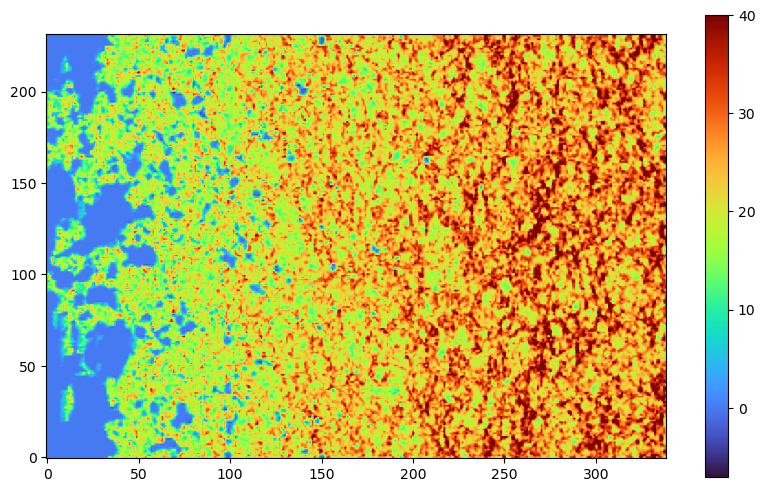

In [8]:
    fig,ax = plt.subplots(figsize=(10,6))
    p0 = ax.imshow(lc_data[10,:,:],origin='lower',cmap='turbo',vmax=40)
    fig.colorbar(p0)

In [9]:
file1=open("/home/gramx/Desktop/cosmology_codes/light_cones/lcone/lightcone_physical_z_xm_xv.dat")
#print (file1.read())
n_fraction=np.loadtxt(file1)
print(n_fraction.shape)
file1.close()

file2=open("/home/gramx/Desktop/cosmology_codes/light_cones/lcone/lightcone_physical_z.dat")
z_data=np.loadtxt(file2)
print(z_data.shape)
file2.close()

print(n_fraction[19,:])





(340, 3)
(124,)
[7.42558617 0.69759511 0.6245853 ]


In [10]:
def chunk(chunk_size,chunk_inumber):
    if chunk_inumber+chunk_size<=339:
        a = n_fraction[chunk_inumber,:]
        b = n_fraction[(chunk_inumber+chunk_size),:]
        z_avg= np.mean([a[0],b[0]]
        xn_avg=1-np.mean([a[1],b[1]])
        print(z_avg,xn_avg)
    
        #print(chunk_data)
        #print(chunk_data.shape)
    
        #print(dl.dtype)
        #print(chunk_data)
    
        light_cone1=lc_data[:,:,chunk_inumber:(chunk_size+chunk_inumber)]
        #print(light_cone1.shape)
        #print (light_cone1)
    
        #chunk_inumber=chunk_inumber+chunk_size
        print(chunk_inumber)
        #fig,ax = plt.subplots()
        #p0 = ax.imshow(light_cone1[10,:,:],origin='lower',cmap='turbo')
        #ax.invert_xaxis()
        #fig.colorbar(p0)
        #print(light_cone1.dtype)
        #print(light_cone1.shape)
        #print(light_cone1)
    else:
        
        a = n_fraction[chunk_inumber,:]
        b = n_fraction[339,:]
        z_avg= (a[0]+b[0])/2
        xn_avg=1-np.mean([a[1],b[1]])
        print(z_avg,xn_avg)
    
        #print(chunk_data)
        #print(chunk_data.shape)
    
        #print(dl.dtype)
        #print(chunk_data)
    
        light_cone1=lc_data[:,:,chunk_inumber:339]
        #print(light_cone1.shape)
        #print (light_cone1)
    
        #chunk_inumber=chunk_inumber+chunk_size
        print(chunk_inumber)
        #fig,ax = plt.subplots()
        #p0 = ax.imshow(light_cone1[10,:,:],origin='lower',cmap='turbo')
        #ax.invert_xaxis()
        #fig.colorbar(p0)
        #print(light_cone1.dtype)
        #print(light_cone1.shape)
        #print(light_cone1)
     
    return light_cone1,chunk_inumber,z_avg,xn_avg
     

In [11]:
def fcone(lightcone,z_avg):
    #print(light_cone1.dtype)
    shape=np.array([])
    #chunk(30,0).shape
    shape=np.array(lightcone.shape)
    #chunk(30,0)
    print(shape)
    #print(light_cone1)
    light_cone1 = lightcone.reshape (shape[0]*shape[1]*shape[2], order='C')
    
    def binarylcmap(np_lcmap,filename):
        with open(filename,"wb") as f:
            f.write(np.array(shape[0],dtype=np.uint32))
            f.write(np.array(shape[1],dtype=np.uint32))
            f.write(np.array(shape[2],dtype=np.uint32))
            data=np_lcmap.tobytes()
            f.write(data)
            
    #binarylcmap(light_cone1,"lc%f.cbin"%z_avg)
    
    return
            
    
    


In [12]:
z_array=np.array([])
xn_array=np.array([])

In [13]:
n=60                                        #chunk_size
for i in range(20,340,30):                 #i=chunk_initial_number
    lc=0
    lc=chunk(n,i)
    fcone(lc[0],lc[2])
    z_array=np.append(z_array,lc[2])
    xn_array=np.append(xn_array,lc[3])


    

    
    


7.723541373769455 0.482517504611115
20
[232 232  60]
8.019979291296872 0.6549825560292335
50
[232 232  60]
8.331733485042324 0.7476811723589312
80
[232 232  60]
8.659881225586862 0.8284090107080527
110
[232 232  60]
9.005597249036096 0.8830094970278913
140
[232 232  60]
9.37016252856894 0.9245764074883918
170
[232 232  60]
9.754976973878287 0.9502559516582045
200
[232 232  60]
10.16157280918208 0.966732500934137
230
[232 232  60]
10.591629471630567 0.9759575964367081
260
[232 232  60]
10.957052672049022 0.9822695913706121
290
[232 232  49]
11.184229108941857 0.984656889437924
320
[232 232  19]


In [19]:
print(z_array)

[ 7.34459579  7.53013361  7.71957226  7.91536621  8.11780428  8.32719183
  8.54385167  8.76812595  9.00037666  9.24098756  9.49036648  9.74894534
 10.01718389 10.29557032 10.58462371 10.88489804]


In [20]:

LCS=np.array([])
ff=np.array([])

In [21]:
for i in range(len(z_array)):
    i=i+1
    File = '/home/gramx/Desktop/cosmology_codes/codes/overlap_40_20/{}Cluster_stat_iso0.100000'.format(i)
    f = open (File,'r')
    z=f.readlines()
    cluster=z[2].split()
    #print(cluster[7])
    ff=np.append(ff,cluster[4])
    LCS=np.append(LCS,cluster[7])


In [22]:
print(len(ff))

16


In [23]:
LCS_array= [float(string) for string in LCS]
ff_array=[float(string) for string in ff]
print(ff_array)
print(z_array)

[0.5238871135552913, 0.3162882728894174, 0.1474212247324614, 0.0715257134363853, 0.0396101181629013, 0.0188164201843044, 0.0095129496135553, 0.0045370095124851, 0.0017770882877527, 0.0007032178953627, 0.0002345607907253, 7.7567627824e-05, 1.95080261593e-05, 1.0218489893e-05, 4.1802913199e-06, 0.0]
[ 7.34459579  7.53013361  7.71957226  7.91536621  8.11780428  8.32719183
  8.54385167  8.76812595  9.00037666  9.24098756  9.49036648  9.74894534
 10.01718389 10.29557032 10.58462371 10.88489804]


In [24]:
z=np.zeros((len(LCS_array),4))
# print(z)
z[:,0]=z_array
z[:,1]=xn_array
z[:,2]=LCS_array
z[:,3]=ff_array
print(z)
np.savetxt('overlap_40_20.txt', z)

[[7.34459579e+00 2.52342785e-01 9.85268302e-01 5.23887114e-01]
 [7.53013361e+00 4.03606515e-01 9.58273369e-01 3.16288273e-01]
 [7.71957226e+00 4.80956356e-01 6.66377855e-01 1.47421225e-01]
 [7.91536621e+00 6.28509821e-01 4.90999532e-02 7.15257134e-02]
 [8.11780428e+00 6.83793547e-01 2.45898756e-02 3.96101182e-02]
 [8.32719183e+00 7.61118476e-01 1.98464615e-02 1.88164202e-02]
 [8.54385167e+00 8.12539417e-01 1.85049558e-02 9.51294961e-03]
 [8.76812595e+00 8.53415304e-01 1.39230139e-02 4.53700951e-03]
 [9.00037666e+00 8.90774842e-01 8.88656560e-03 1.77708829e-03]
 [9.24098756e+00 9.17815508e-01 1.45310436e-02 7.03217895e-04]
 [9.49036648e+00 9.36987739e-01 3.36633663e-02 2.34560791e-04]
 [9.74894534e+00 9.53718151e-01 4.19161677e-02 7.75676278e-05]
 [1.00171839e+01 9.64657416e-01 9.52380952e-02 1.95080262e-05]
 [1.02955703e+01 9.72291839e-01 9.09090909e-02 1.02184899e-05]
 [1.05846237e+01 9.77377416e-01 2.22222222e-01 4.18029132e-06]
 [1.08848980e+01 9.81341621e-01            nan 0.000000

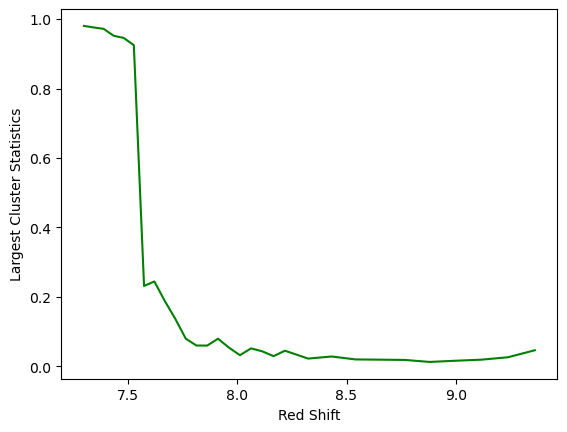

In [61]:
plt.xlabel("Red Shift")
plt.ylabel("Largest Cluster Statistics")
plt.plot(z_array[:30],LCS_array[:30],color='g')

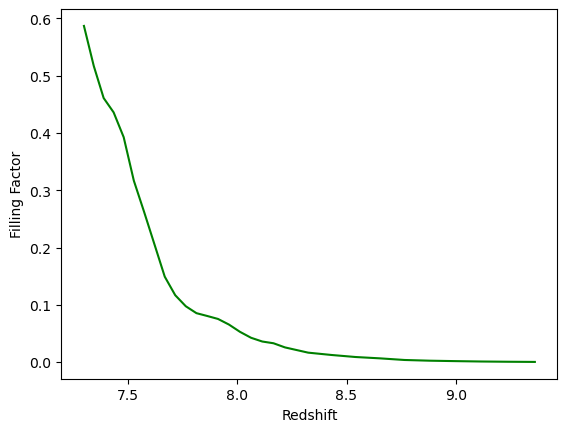

In [62]:
plt.xlabel("Redshift")
plt.ylabel("Filling Factor")
plt.plot(z_array[:30],ff_array[:30],color='g')